# APP ON SOLAR PREDICTION DATASET

This dataset originally use for the prediction of solar radiation. The data was collected within September through December of 2016. However in this work project, we will be looking at:
1. At what time of the day during these four months, that the radiation is strong or measured in high value?
2. At what time of the day during these four months, that the radiation is at the lowest value?


3. Plotting:
    - Amount of data collected for each month
    - The relationship betweens:
       - An occurrence of Temperature vs Radiation
       - An occurrence of Pressure vs Radiation
      
      
4. User input functions:
   - Temperature conversion
   - Determination of Wind Directions
   
Below are the data dictionary which stated the units of each data columns:
- Solar radiation: W/m2 (Watts per meter^2)
- Temperature: ℉ (Degrees Fahrenheit)
- Barometric pressure: Hg
- Humidity: %
- Wind direction: Degrees
- Wind speed: MPH (Miles per hour)
- Sunrise/sunset: GMT-10 (Hawaii time)

## Step 1:
### Importing pandas, numpy, matplotlib.pyplot, datetime, seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

#set the plot to be display in the Jupyter Notebook
%matplotlib inline

# Use to change the color of the plot
plt.style.use('tableau-colorblind10')

# Set the figure and font size of the plot
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 10

## Step 2:
### Load the dataset into Jupyter Notebook and extracting the basic information of the dataset:

In [3]:
# Read the csv file
solar_rad = pd.read_csv("../data/SolarPrediction.csv")

# Show first 5 dataframe
solar_rad.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
# checking the shape of the data: rows and columns
solar_rad.shape

(32686, 11)

In [5]:
# checking type of every columns of the data
# output: int64, float64, object == string
solar_rad.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [6]:
# checking if the dataframe contain any null
solar_rad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [7]:
# Reset the index
solar_rad.set_index('UNIXTime', inplace=True)

In [8]:
solar_rad.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,
1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [12]:
# Rename the columns
solar_rad.rename(columns={'Radiation':'Radiation (W/m^2)', 'Temperature':'Temperature (℉)','Humidity':'Humidity (%)', 'Pressure':'Pressure (Hg)', 'WindDirection(Degrees)':'WindDirection (Degrees)', 'Speed':'WindSpeed (mph)'}, inplace=True)
solar_rad.head()

,Data,Time,Radiation (W/m^2),Temperature (℉),Pressure (Hg),Humidity (%),WindDirection (Degrees),WindSpeed (mph),TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,
1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


## Step 3: Determine the maximum and minimum of radiation values
### 1: At what time of the day during these four months, that the radiation is strong or measured in high value? and what is the respectives temperature, pressure and humidity.

In [13]:
solar_rad[['Data', 'Time', 'Radiation (W/m^2)', 'Temperature (℉)', 'Pressure (Hg)', 'Humidity (%)']].groupby(by=['Time', 'Data']).max().sort_values('Radiation (W/m^2)', ascending=False).head(1)

,,Radiation (W/m^2),Temperature (℉),Pressure (Hg),Humidity (%)
Time,Data,,,,
12:15:04,9/4/2016 12:00:00 AM,1601.26,61,30.47,93


### 2: At what time of the day during these four months, that the radiation is at lowest value? and what is the respectives temperature, pressure and humidity.

In [14]:
solar_rad[['Data', 'Time', 'Radiation (W/m^2)', 'Temperature (℉)', 'Pressure (Hg)', 'Humidity (%)']].groupby(by=['Time', 'Data']).min().sort_values('Radiation (W/m^2)').head(1)

,,Radiation (W/m^2),Temperature (℉),Pressure (Hg),Humidity (%)
Time,Data,,,,
02:50:49,12/29/2016 12:00:00 AM,1.11,37,30.35,54


## Step 4:
### Show how many data is collected for each months: plot

In [15]:
# Add a new column name "Month"
solar_rad['Month'] = pd.to_datetime(solar_rad['Data']).dt.month

In [16]:
# Check is the new column succesfull created or not
solar_rad.head(3)

,Data,Time,Radiation (W/m^2),Temperature (℉),Pressure (Hg),Humidity (%),WindDirection (Degrees),WindSpeed (mph),TimeSunRise,TimeSunSet,Month
UNIXTime,,,,,,,,,,,
1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9
1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9
1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9


### 3. Plotting
#### - Amount of data collected for each month

10    8821
11    8284
12    8164
9     7417
Name: Month, dtype: int64

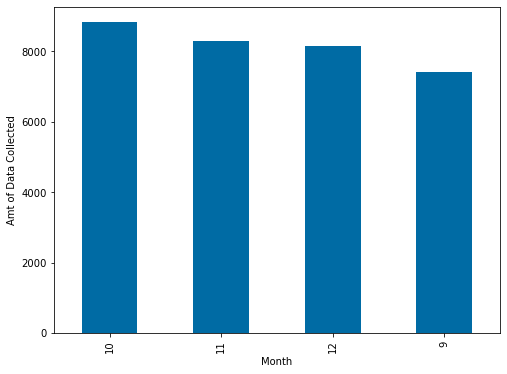

In [17]:
# showing data collection of each month
plt.style.use('tableau-colorblind10')
solar_rad['Month'].value_counts().plot(kind='bar');
plt.xlabel('Month')
plt.ylabel('Amt of Data Collected')
solar_rad['Month'].value_counts()

#### - An occurrence of Temperature vs Radiation

<AxesSubplot:xlabel='Temperature (℉)', ylabel='Radiation (W/m^2)'>

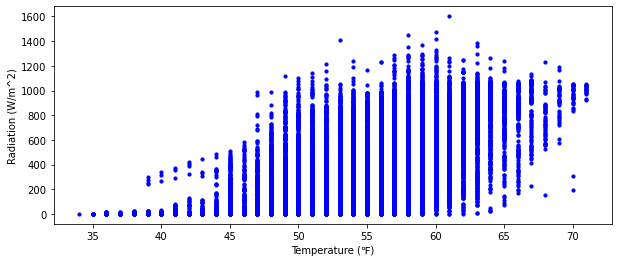

In [67]:
solar_rad.plot(kind='scatter', x='Temperature (℉)', y='Radiation (W/m^2)', \
               color='blue', figsize=(10,4), s=10, alpha=1)

#### - An occurrence of Pressure vs Radiation

<AxesSubplot:xlabel='Pressure (Hg)', ylabel='Radiation (W/m^2)'>

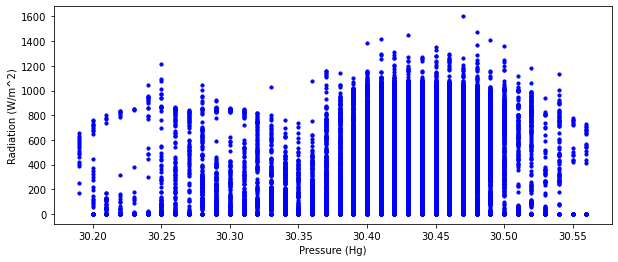

In [68]:
solar_rad.plot(kind='scatter', x='Pressure (Hg)', y='Radiation (W/m^2)', \
               color='blue', figsize=(10,4), s=10, alpha=1)

### 4: User Input Functions

In [70]:
class Solar_info:
    
    def __init__(self, date = solar_rad['Data']):
        self.date = date
    
    def temp_conversion():   #any temp user enter that == temp in dataframe, convert to celcius
        while True:
            try:
                temp_input = int(input('Enter the °F temperature to convert to °C:'))

                for each_temp in (solar_rad['Temperature (℉)']):
                    if temp_input == each_temp:
                        temp_in_celcius = (temp_input-32)*(5/9)
                        print('The Fahrenheit temperature of {}°F, is {:.2f}°C in Degree Celcius'.format(temp_input,temp_in_celcius))
                        return

            except Exception as ex:
                print("The temperature format is incorrect: {}".format(ex.args))
                continue
                
                
    def wind_direction():  #any value of wind in term of degree, found in dataframe, give user wind direction
        
        while True:
            try:
                direction_input = float(input('Enter the wind value:'))
                
                for each_wind in solar_rad['WindDirection (Degrees)']:
                    
                    if direction_input >= 350 and direction_input < 20:                 #statement 1
                        print('The wind direction is {}°N'.format(direction_input))
                        return

                    if direction_input >= 20 and direction_input < 40:                 #statement 2
                        print('The wind direction is N{}°NE'.format(direction_input))
                        return

                    if direction_input >= 40 and direction_input < 60:                 #statement 3
                        print('The wind direction is {}°NE'.format(direction_input))
                        return
                        
                    if direction_input >= 60 and direction_input < 80:                 #statement 4
                        print('The wind direction is E{}°NE'.format(direction_input))
                        return

                    if direction_input >= 80 and direction_input < 110:                 #statement 5
                        print('The wind direction is {}°E'.format(direction_input))
                        return

                    if direction_input >= 110 and direction_input < 130:                 #statement 6
                        print('The wind direction is E{}°SE'.format(direction_input))
                        return

                    if direction_input >= 130 and direction_input < 150:                 #statement 7
                        print('The wind direction is {}°SE'.format(direction_input))
                        return

                    if direction_input >= 150 and direction_input < 170:                 #statement 8
                        print('The wind direction is S{}°SE'.format(direction_input))
                        return

                    if direction_input >= 170 and direction_input < 200:                 #statement 9
                        print('The wind direction is {}°S'.format(direction_input))
                        return

                    if direction_input >= 200 and direction_input < 220:                 #statement 10
                        print('The wind direction is S{}°SW'.format(direction_input))
                        return

                    if direction_input >= 220 and direction_input < 240:                 #statement 11
                        print('The wind direction is {}°SW'.format(direction_input))
                        return

                    if direction_input >= 240 and direction_input < 260:                 #statement 12
                        print('The wind direction is W{}°SW'.format(direction_input))
                        return

                    if direction_input >= 260 and direction_input < 290:                 #statement 13
                        print('The wind direction is {}°W'.format(direction_input))
                        return

                    if direction_input >= 290 and direction_input < 310:                 #statement 14
                        print('The wind direction is W{}°NW'.format(direction_input))
                        return

                    if direction_input >= 310 and direction_input < 330:                 #statement 15
                        print('The wind direction is {}°NW'.format(direction_input))
                        return

                    if direction_input >= 330 and direction_input < 350:                 #statement 16
                        print('The wind direction is N{}°NW'.format(direction_input))
                        return

            except Exception as ex:
                print("There is an error: {}".format(ex.args))
                continue
                

In [72]:
Solar_info.temp_conversion()

Enter the °F temperature to convert to °C:63
The Fahrenheit temperature of 63°F, is 17.22°C in Degree Celcius


In [73]:
Solar_info.wind_direction()

Enter the wind value:53
The wind direction is 53.0°NE


## Future Code Recommendation
- Create input user function:
  - Access data with 2 columns and return other data:
      - Get 2 input from the user: date and time from the columns
      - if date and time match in any row, 
      - return to user the temperature or radiation or humidity or any kind of information from the respective columns
  - Function that can plot info given by user:
      - User type 'Average of Temperature'
      - function return Average of temperature in term of plot/graph

- Create plot of Wind Direction and Wind Speed. 
  - use wind Rose plot type: 
  - Reference: *image was taken from google
  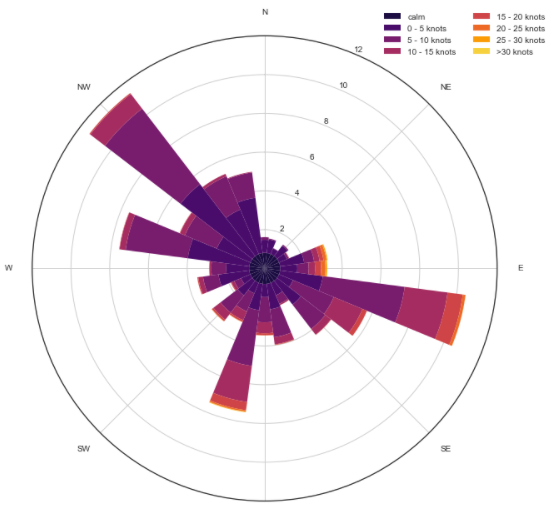



##### Nurfarah binti Jaafar